In [2]:
import pandas
import helpers
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

%matplotlib inline

# Подход 1: градиентный бустинг "в лоб"

In [4]:
X, y, X_kaggle = helpers.get_clean_data()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

## Подбираем оптимальное число деревьев

In [7]:
scores = []
nums = [10, 20, 30, 50, 100, 250]
for n in nums:
    print('#', str(n))
    model = GradientBoostingClassifier(n_estimators=n, random_state=42)
    start_time = datetime.datetime.now()
    model_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)
    print('Time elapsed:', datetime.datetime.now() - start_time)
    print(model_scores)
    scores.append(np.mean(model_scores))

# 10
Time elapsed: 0:00:10.467551
[0.66383799 0.66635457 0.66360048 0.66529818 0.66516222]
# 20
Time elapsed: 0:00:16.956258
[0.68083889 0.68272733 0.67969876 0.6834932  0.6855512 ]
# 30
Time elapsed: 0:00:24.865209
[0.68892093 0.68934663 0.68712298 0.69180598 0.69283583]
# 50
Time elapsed: 0:00:40.646065
[0.69627399 0.69747879 0.69470891 0.69921915 0.69979097]
# 100
Time elapsed: 0:01:20.565871
[0.70515496 0.706077   0.70429951 0.7074682  0.70811523]
# 250
Time elapsed: 0:03:17.089704
[0.71547078 0.71462661 0.71535522 0.71731507 0.71680663]


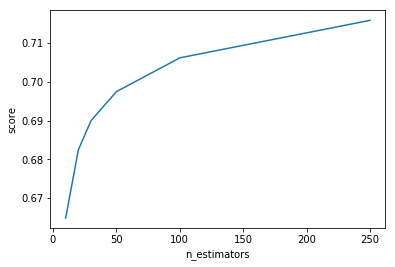

In [8]:
plt.plot(nums, scores)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

Кросс-валидация для градиентного бустинга с 30 деревьями заняла 0:01:05. Показатель метрики качества AUC-ROC в таком случае равен 0.69.

Увеличение количества деревьев также увеличивает показатель метрики AUC-ROC, приближая его к 0.72. Для достижения большего качества имеет смысл использовать более 30 деревьев. Для ускорения обучения можно использовать не всю выборку, а некоторое ее подмножество — например, половину объектов. Также можно уменьшить глубину деревьев (max_depth).